
**«ЧИСЛЕННОЕ ДИФФЕРЕНЦИРОВАНИЕ»**


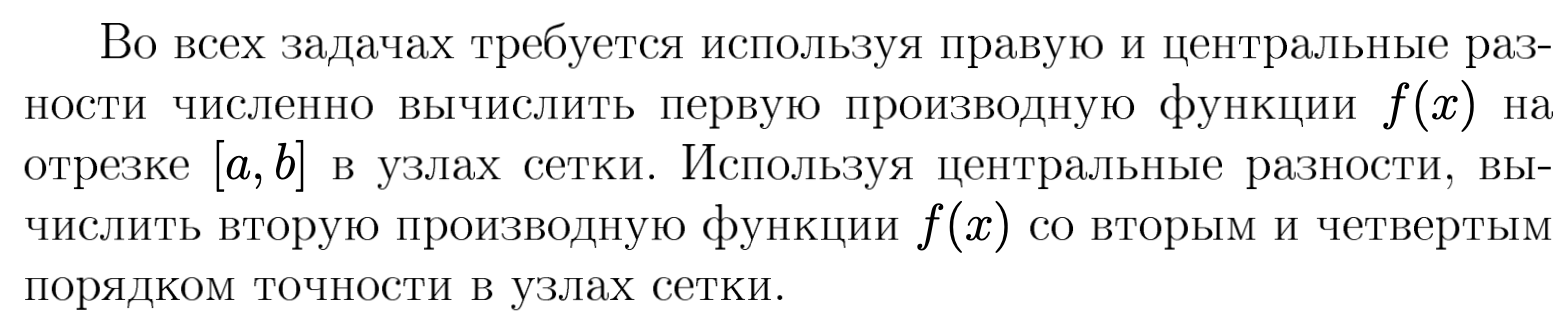

# 1) Импортируем необходимые библиотеки


In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2) Задаем необходимые параметры и определяем функции:
* f(x)
* её аналитическую производную
* её вторую аналитическую производную

In [ ]:
a = -1.5
b = 1.5
N = float(input('Введите количество узлов сетки: '))
h = (b - a) / (N - 1)

def f(x):
  f = math.sin(x) / (2 + x)
  return f

def df(x):
  df = (math.cos(x) * (x + 2) - math.sin(x)) / ((x + 2) * (x + 2))
  return df

def ddf(x):
    # Вычисляем числитель в соответствии с выведенной формулой:
    num = - (x + 2)**3 * math.sin(x) - 2 * (x + 2)**2 * math.cos(x) + 2 * (x + 2) * math.sin(x)
    den = (x + 2)**4
    return num / den

Введите количество узлов сетки: 20


# 2) Создаем списки из координат узлов и значений производной функции в узлах численным и аналитическим методом
Для правой разности:

In [ ]:
point = a
x = []
y = []
dy = []
while point < b:
  x.append(point)
  y.append((f(point + h) - f(point)) / h)
  dy.append(df(point))
  point += h

data = pd.DataFrame({'x': x, 'y': y})
ddata = pd.DataFrame({'x': x, 'y': dy})

Для центральной разности:

In [ ]:
point = a + h
x_cent = []
y_cent = []
dy_cent = []
while point < b:
  x_cent.append(point)
  y_cent.append((f(point + h) - f(point - h)) / (2 * h))
  dy_cent.append(df(point))
  point += h

data_cent = pd.DataFrame({'x': x_cent, 'y': y_cent})
ddata_cent = pd.DataFrame({'x': x_cent, 'y': dy_cent})

# 3) Аналогично создаем списки из координат узлов и значений второй производной функции в узлах численным и аналитическим методом
Для второго порядка точности:

In [ ]:
point = a + h
x_cent_2por = []
y_cent_2por = []
ddy_cent_2por = []
while point < b:
  x_cent_2por.append(point)
  y_cent_2por.append((f(point + h) + f(point - h) - (2 * f(point))) / (h ** 2))
  ddy_cent_2por.append(ddf(point))
  point += h

data_2 = pd.DataFrame({'x': x_cent_2por, 'y': y_cent_2por})
ddata_2 = pd.DataFrame({'x': x_cent_2por, 'y': ddy_cent_2por})

Для четвертого порядка точности:

In [ ]:
point = a + (2 * h)
x_cent_4por = []
y_cent_4por = []
ddy_cent_4por = []
while point <= b:
  x_cent_4por.append(point)
  y_cent_4por.append(((- 1 * f(point - (2 * h))) + (16 * f(point - h)) - (30 * f(point)) + (16 * f(point + h)) - f(point + (2 * h))) / (12 * h ** 2))
  ddy_cent_4por.append(ddf(point))
  point += h

data_4 = pd.DataFrame({'x': x_cent_4por, 'y': y_cent_4por})
ddata_4 = pd.DataFrame({'x': x_cent_4por, 'y': ddy_cent_4por})

# 4) Выводим графики

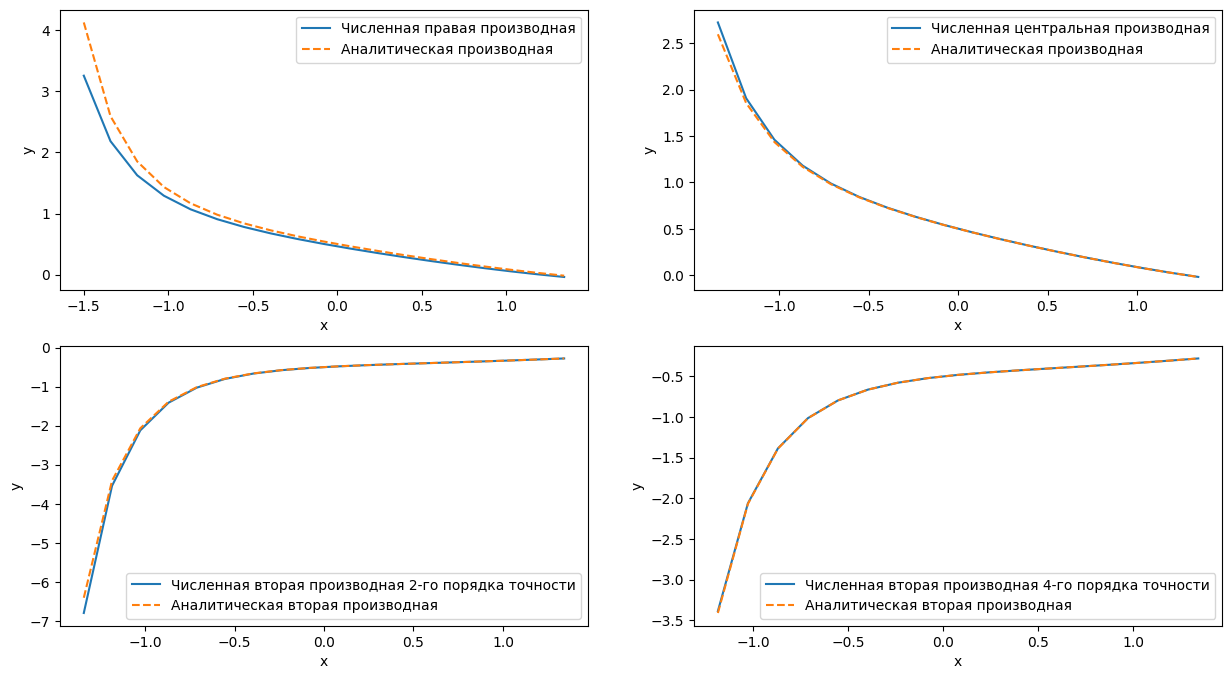

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

graph1 = sns.lineplot(data, x=data.x, y=data.y, label="Численная правая производная", ax=ax[0, 0])
graph2 = sns.lineplot(ddata, x=ddata.x, y=ddata.y, label="Аналитическая производная", linestyle="--", ax=ax[0, 0])

cent_graph1 = sns.lineplot(data_cent, x=data_cent.x, y=data_cent.y, label="Численная центральная производная", ax=ax[0, 1])
cent_graph2 = sns.lineplot(ddata_cent, x=ddata_cent.x, y=ddata_cent.y, label="Аналитическая производная", linestyle="--", ax=ax[0, 1])

d2_cent_graph1 = sns.lineplot(data_2, x=data_2.x, y=data_2.y, label="Численная вторая производная 2-го порядка точности", ax=ax[1, 0])
d2_cent_graph2 = sns.lineplot(ddata_2, x=ddata_2.x, y=ddata_2.y, label="Аналитическая вторая производная", linestyle="--", ax=ax[1, 0])

d4_cent_graph1 = sns.lineplot(data_4, x=data_4.x, y=data_4.y, label="Численная вторая производная 4-го порядка точности", ax=ax[1, 1])
d4_cent_graph2 = sns.lineplot(ddata_4, x=ddata_4.x, y=ddata_4.y, label="Аналитическая вторая производная", linestyle="--", ax=ax[1, 1])